In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.misc import imread
import glob
import time

from tracker import tracker

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fn = glob.glob('/home/dg86/src/tensorbox_DGG/data/lorenzmie/validation/*.png')

In [3]:
trk = tracker()

INFO:tensorflow:Restoring parameters from /home/dg86/python/tracker/models/lorenzmie.ckpt


In [4]:
a = imread(fn[100], mode='RGB')
boxes = trk.predict(a)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


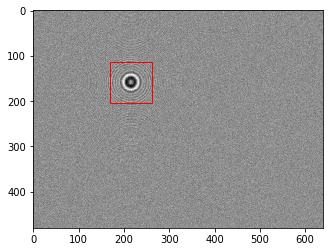

In [5]:
fig,ax = plt.subplots(1)
ax.imshow(a)
for n in np.arange(boxes.shape[0]):
    coords = boxes[n,:]
    coords[0] -= coords[2]/2
    coords[1] -= coords[3]/2
    rect = patches.Rectangle(coords[0:2],coords[2],coords[3],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [11]:
b = np.zeros((480,640,3)) + 140.
start = time.clock()
bb = trk.predict(b)
print time.clock() - start

2.34558


In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3498925570108323167]